In [1]:
import numpy as np

import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras import layers
from keras import losses
from keras import metrics
from keras import models
from keras import optimizers


Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[0][:10])

[1, 608, 13, 1040, 6, 2, 733, 503, 1148, 4]


In [4]:
# Prep the data
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
# One hot encode the list of numbers (which represent words)
def vectorize_sequences(sequences, dimension=10000):
    # all-zero matrix of zeros of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
        

In [6]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
# Model architecture
model = models.Sequential()

#layers
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Optimizer, loss function, metrics 
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [8]:
# Save a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.5000 - binary_accuracy: 0.7955 - val_loss: 0.3792 - val_binary_accuracy: 0.8706
Epoch 2/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.2996 - binary_accuracy: 0.9079 - val_loss: 0.3206 - val_binary_accuracy: 0.8766
Epoch 3/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.2195 - binary_accuracy: 0.9322 - val_loss: 0.3080 - val_binary_accuracy: 0.8757
Epoch 4/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1703 - binary_accuracy: 0.9459 - val_loss: 0.3197 - val_binary_accuracy: 0.8724
Epoch 5/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1378 - binary_accuracy: 0.9571 - val_loss: 0.3060 - val_binary_accuracy: 0.8790
Epoch 6/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.1120 - binary_accuracy: 0.9652 - val_loss: 0.3235 - val_binary_a

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

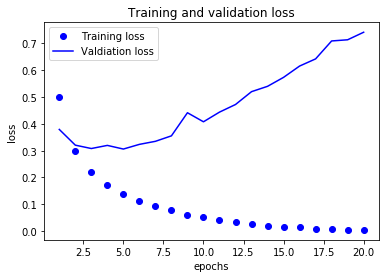

In [11]:
# Plot training and validation loss
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Valdiation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show();

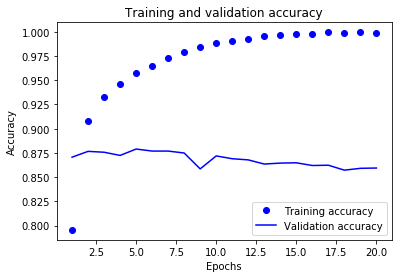

In [12]:
# Plot training and validation accuracy
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();